# Topic-specific corpus building: The creation of a representative newspaper corpus on the topic of return migration using text mining methods



anon
   

anon

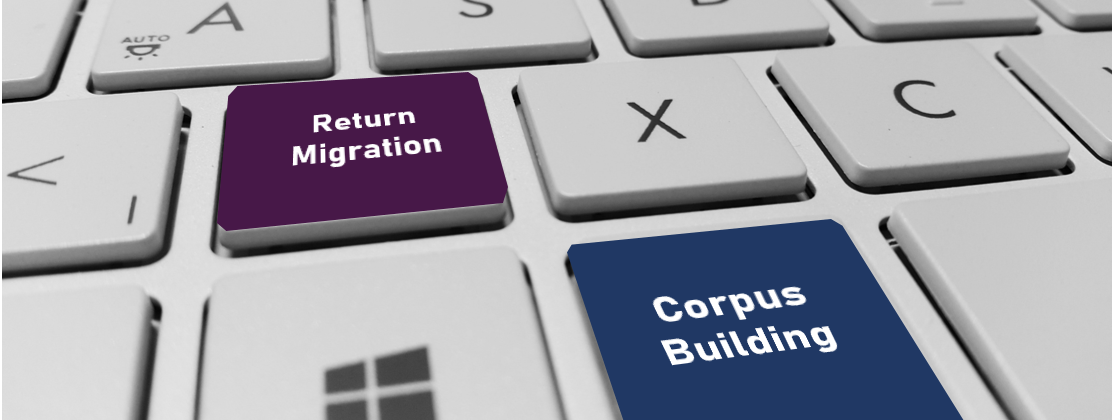

In [1]:
from IPython.display import Image
display(Image("images/cover.png"))

This  work has  been  supported  by  the  European  Union  Horizon  2020  research  and innovation programme under grant 770299 (NewsEye).

Corpus Building, Return Migration, Historical Newspapers, Text Mining, Word Sense Disambiguation, Similiarity

Humanities researchers often encounter the problem that their specialized corpora, created by keyword searches, either contain documents that are irrelevant for their research questions because the search queries were too broad, or they miss relevant documents because the search requests were too narrow. The reason for this lies in the complexity of language, which is characterized by ambiguity and concepts that are difficult, if not impossible, to trace by computational methods and thus keyword searches alone. This paper shows how text mining methods can support the building of a topic-specific corpus. Using the example of  return migration issues, the aim is, on the one hand, to build a corpus that is as representative as possible and, on the other hand, to overcome the bias that comes with complex keyword searches that are influenced by the researcher's prior knowledge. The paper begins with a discussion of the motivations for and the challenges of building research driven corpora, leads through the steps that were taken to obtain a satisfactory corpus that can be analyzed further  and  gives an outlook on how the created corpus was used to conduct a qualitative, discourse-driven analysis on return migration from the Americas to Europe between 1850 and 1950.

## 1 Introduction

Historiography based on digital sources usually comes hand in hand with the need to search for complex patterns in masses of information rather than gaps in the historical record <cite data-cite="6142573/B353HSFG"></cite>. This development has led to a certain hybridity of classical and digital methods in historical research<cite data-cite="6142573/NY822LF2"></cite>, and goes along with methodological and epistemological challenges for the historical disciplines. It also calls for an extension of the historical method, which guides historical understanding through the three steps heuristics, source criticism and interpretation <cite data-cite="8918850/AH3TIH3N"></cite>. Especially the update on source criticism has received much attention and is discussed within the emerging field of digital hermeneutics <cite data-cite="6142573/JMZAZWUX"></cite> <cite data-cite="8918850/AH3TIH3N"></cite><cite data-cite="6142573/LAF2DBJT"></cite><cite data-cite="6142573/5FI5SV3F"></cite>. Other parts of the historical method, like a detailed critical assessment of adequate corpus creation in the heuristic research step, have so far not been written about enough.

Historical research is often driven by event- or topic-specific research questions. This means that although using big data and quantitative methods to find patterns that overlap with these research questions can be rewarding, it oftentimes is still necessary to find those parts in the massive data dumps that are relevant for the topic in question. This is why corpus building is an essential aspect when working with large amounts of digital sources. However, to create adequate corpora often requires time-consuming complex search processes. Moreover, not every corpus is suitable for historical analysis. Historical corpus-driven/corpus-based studies (quantitative, but also qualitative) rely both on the quality and the representativeness of the selected collection in order to qualify for further analysis. Here, a distinction is made between external and internal criteria for corpus design and composition <cite data-cite="6142573/3YMW54I3"></cite>. An important external criterion is the quality of the sources. This refers, on the one hand, to the reliability of the sources and, on the other hand, to the Optical Character Recognition (OCR) quality of the data (e.g., if retro-digitized sources are being used). A second important external criterion is the representativeness of sources. In the case of, e.g. digitized newspapers, this includes questions like whether the used digitized newspapers are representative for the research in question if important newspapers or newspaper issues are missing or if the data of digitized issues is accessible, readable, and contains enough metadata for proper contextualisation. 

An important internal criterion that affects the representativeness of topic-specific corpora is the number of documents in a collection <cite data-cite="6142573/3YMW54I3"></cite>. To improve the completeness (not too many relevant documents are left out) and purity (not too many irrelevant documents are included) of corpora, is an overall goal when creating topic-specific corpora. Although the creation of a 'pure corpus' per se will remain an unattainable goal for many reasons and there can be no such thing as a generically representative corpus <cite data-cite="6142573/DZ5DRETR"></cite>, for this paper we define representativeness as a factor that depends very much on the purpose for which the corpus is intended for and on its ability to allow research questions to be answered without serious biases.

When keywords are being used to create specialized collections, researchers often have to weigh up between a collection that misses relevant articles, and one which contains noise (i.e. irrelevant texts). In other words, there is a conflict between creating a corpus that contains only relevant texts but not all relevant texts available in the entire collection and creating a corpus that contains all available relevant texts, but includes many irrelevant texts <cite data-cite="6142573/RZWYTHC7"></cite><cite data-cite="6142573/TTCX55K3"></cite>. This is especially problematic if the creation of a corpus relies on keywords since search terms are often polysemous or ambiguous, which also to the topic we chose to investigate here, where we will use German keywords related to return migration to compose our corpus.

This paper shows how a corpus created with ambiguous search queries related to return migration is successfully classified into relevant and irrelevant articles, i.e., disambiguated by applying digital methods. A semi-supervised similarity-based word sense disambiguation (WSD) approach using Latent Dirichlet allocation (LDA), a probabilistic model that calculates the probability distribution over terms <cite data-cite="6142573/CVSFNSE2"></cite>, and the Jensen-Shannon divergence (JSD), which measures the divergence between two probability distributions <cite data-cite="6142573/LM8L24CE"></cite>, was applied to reach this goal. Both approaches, the training of the LDA algorithm as well as the similarity measurements are unsupervised and build on the whole context of a document. Topics can capture the polysemous or ambiguous use of words, but they do not carry the explicit notion of the correct context that is necessary for WSD <cite data-cite="6142573/WLBLU3DX"></cite>. Therefore, a training/feedback corpus with information (labels) on the 'correct' or 'incorrect' context (relevant or irrelevant  for the research question) was created manually for document comparison and clustering. The document labels do not play a role in training the LDA algorithm and finding the most similar set of documents in the feedback corpus, however, they allow the calculation of the overall relevance of the retrieved most similar set of documents based on the numeric labels. This calculation is used to support the final classification into relevant or non relevant documents, as explained step by step in the hermeneuticslayers of this paper.

The motivation of this paper is to present and describe this process by means of a specific topic (migration) and a specific research question (concerning return migration). In addition we want to show how the created corpus was used to conduct a qualitative, discourse-driven historical analysis on return migration from the Americas to Europe between 1850 and 1950 in order to underline the necessity to investigate more thought and research to support digital methods that lie between qualitative analysis of small information units and quantitative approaches to big data. Discourse analysis has always also relied on a thorough reading of relevant text corpora. With ever-increasing large digital datasets, automated corpus-specific approaches (such as the calculation of multi-words units) promise to support qualitative interpretative steps like the ones needed for discourse analysis <cite data-cite="6142573/KAFFLBWQ"></cite><cite data-cite="6142573/GRIVXPM6"></cite>. Digital methods to support the corpus building are equally effective, which is why we show how the quality and representativeness of a corpus can be improved using NLP methods. In doing so, we present a corpus building method to support humanities research, which means that the focus lies on solving this one specific problem and not on a comparison or evaluation of different approaches or methods. Still, the approach presented in this paper can be adapted for research projects that deal with similar corpus building issues.

## 2 Return migration in historical newspapers

News coverage on return migration - which can generally be defined as 'cross-border migration to the country of origin' <cite data-cite="6142573/YKNUBLK6"></cite> - is manifold: Reports on remigration and repatriation give insights into special events (Figure 1), letters from returnees printed in newspapers allow for glimpses into the thoughts of returnees, appeals inform about support efforts, and small advertisements provide an overview of what was sold or searched for in connection with return migration (Figure 2). Just as immigration, return migration has always also been a question of social negotiation. Defining discourses as a ‘group of statements that belong to a single system of formation’ <cite data-cite="6142573/PBSKPE7S"></cite> we find several characteristic discourses on return migration especially in reports, letters, and appeals, which include (implicit) arguments to support, promote, regulate or prohibit the return of people to their country to origin (chapter 2.7.1 gives deeper insights into these discourses that accompanied return migration movements). 

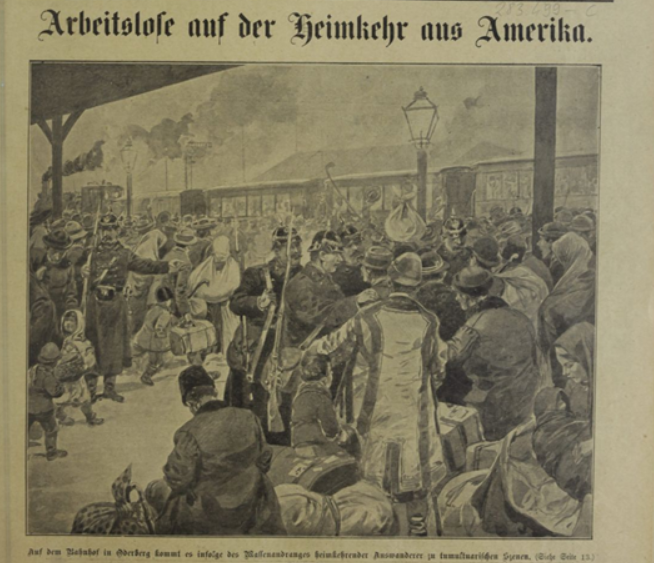

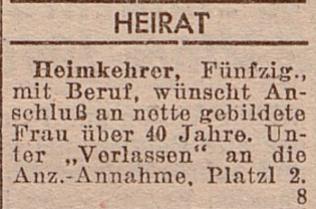

In [2]:
from IPython.display import Image, display
metadata_1={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 1: Das interessante Blatt, 12.12.1907, p. 1. ",
          ]
        }
    }
}
display(Image("images/return_migration.png"), metadata=metadata_1)
metadata_2={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 2: Salzburger Blatt, 5.5.1946, p. 8.",
          ],
            
        }
    }
}
display(Image("images/rückwanderer2.png"), metadata=metadata_2)

### 2.1 The motivation for corpus building

Newspapers are the 'predominant social field' for the creation of information, beliefs or arguments, which are necessary 'for establishing and sustaining economic, social and political systems and orders' <cite data-cite="6142573/YGUFHGJK"></cite>. While historical return migration movements have been little researched in scholarly contexts, newspapers indicate that return migration has certainly been an important topic within historical migration processes – also in recent times. Examples include the return to Europe from overseas in the 19th and 20th century, the return of war veterans and the repatriation of war refugees during and after the First World War, or the return and repatriation of prisoners of war, refugees, exiles, concentration camp survivors, etc. during and after the Second World War. The main motivation for the paper here, therefore, was to produce empirical material for further qualitative and qualitative analysis on the topic of return migration. The questions behind this approach are as follows: What discourses accompanied the newspaper reporting on return migration? Were return migrants welcomed or perceived as a burden and thread when returning back to their country of origin?

In academic literature, migration was often described as a one-way process, beginning with the 'uprooting' of people at the point of origin and ending with 'assimilation' into their adopted culture and country. <cite data-cite="6142573/K2RNGLST"></cite> phrased this as follows: 'Although temporary and circular migration patterns are of a special importance for European people in modern times, they were neglected by migration research for decades'. Still, recent research indicates that many people left their home countries with the notion of returning home at a certain point not so far in the future. This is also true for those who left their home voluntarily to resettle in other countries. Migration is therefore neither a linear process, nor is a model that goes in both directions appropriate. In many cases, emigrants returned only temporarily and left their country of origin again after a while or they moved from one country to the next and returned to different places.

Historical research on return migration considers such patterns of, and motivations for, return migration <cite data-cite="6142573/BXVFU4ZK"></cite>, examines historical, political, sociological and economic backgrounds <cite data-cite="6142573/F3B5EV7L"></cite><cite data-cite="6142573/GP9W87WP"></cite><cite data-cite="6142573/HP5RBUIN"></cite>, or deals with autobiographical questions <cite data-cite="6142573/9DLPRG9V"></cite>. The complexity and heterogeneity of sources about return migration, however, complicates a structured analysis of the topic of return migration. The historical constellations are so diverse that generalizations are difficult to make and thus inherently faulty. What adds to the difficulties is the lack of empirical material.The compilation of a corpus of historical newspaper articles, as proposed here, is therefore still an essential factor if the topic of remigration is to be accessible for research.

### 2.2 The challenges

Researching migration issues with digital newspaper interfaces usually begins with unstructured keyword searches and it oftentimes is serendipity that leads to good results <cite data-cite="6142573/JMD7CSSP"></cite>. Keyword searches, however, often return a significant amount of irrelevant results or exclude too many relevant results. A common reason for this is to be found in the difficult nature of language. Synonymy and polysemy complicate keyword searches, but not alone. Word inflections, and concepts that do not equate to single words also play a significant role <cite data-cite="6142573/AH3TIH3N"></cite>.

Return migration as defined before and the ideas associated with it are difficult to trace by keyword searches because of the following reasons:

1. Ideas and discourses are difficult to find using single keywords alone: There are only a few terms that lead to exclusively relevant articles on return migration, such as 'Rückkehrer', 'Heimkehrer' or 'Rückwanderer' (all German terms for *returnee*). However, they only cover a small amount of the whole spectrum of return migration news coverage. Return migration in the German language is often also expressed by verbal constructions such as 'kehrten in die Heimat zurück' (*returned home*) or phrases such as 'Rückkehr der Emigranten' (*return of the emigrants*).

2. Word flexions complicate phrase searches or the combination of search terms: Phrase searches in a distance of k words are another way to improve the representativeness of a corpus. Here it would be combinations such as 'heimkehrende Auswanderer' (*returning emigrants*) or the combination of keywords that occur together in a defined word distance such as 'Rückkehr ... Auswanderer' (*return ... migrants*). However, these combinations involve a number of challenges; Firstly, it is difficult to find all kind of different combinations that would represent the topic in an adequate way. Secondly, it would be very time-consuming to consider all possible word flexions. Finally, even if it were possible to cover the topic of return migration in its entirety, many of the word combinations (e.g., 'heimat zurückkehren' (*returning home*) would lead to results that are not relevant for the research project.

3. Words have different meanings in different contexts (ambiguity): Expanding the search to more ambiguous words such as 'Heimkehr' (*returning home*) or 'Rückkehr' (*returning back*)  helps to find more relevant articles but often leads to a considerable amount of irrelevant search results as well. The process of identifying the actual meanings of words can be considered as one of the most challenging problems in NLP <cite data-cite="6142573/LVI27PCC"></cite>. The following texts show examples of relevant and non relevant articles on the topic of return migration found by using ambiguous search terms. The first newspaper clipping of the Austrian newspaper *Innsbrucker Nachrichten* from May 1913 contains the search term 'Rückwanderung' and reports about the return of Slavic workers from America. This article is relevant for the present research project and will therefore be labeled as relevant:

In [18]:
import pandas as pd
import re
import re, numpy as np, pandas as pd
import csv
from pprint import pprint
from IPython.display import display
#import data
df = pd.read_csv('data/export_returnmigration_16_04_2021_21_35.csv', usecols = ['text','relevancy'])

#show article with translation
article_1 = df['text'][41].replace("\n"," ")
translation = "The Balkan War. Return migration to the Balkan states. We receive a letter from Bregenz on the 7th of this month. For some days now one has been able to observe on the Lake Constance ships and railway trains many Slav workers returning from America to their homeland, the Balkan states. According to an emigrant agent, these states, from which the war has taken many men, have initiated a great campaign to persuade the children of the country resident in America to return home. Many of the Slavs employed in the Rhenish labour areas are also returning. The Homeland Council, through its own consulates, grants them the greatest possible support in the form of money and means to establish their own herds. The ships bring many such returnees here via Constance and Württemberg."
df_article = pd.DataFrame(np.column_stack([article_1]), 
                              columns=['Original Text'])
df_translation = pd.DataFrame(np.column_stack([translation]), 
                               columns=['Translation'])
df_article_1 = pd.concat([df_article, df_translation],axis=1)
s = df_article_1.columns=['Original Text', 'Translation']
s = df_article_1.style.set_caption('Table 1: Innsbrucker Nachrichten, May 1913 | left: original; right: translation').hide_index() ;s
display(s)


Original Text,Translation
"Der Balkankrteg. Rückwanderung in die Balkanstaaten. Aus Bregenz schreibt man uns vom 7. d. M.. Seit einigen Tagen kann man auf den Bodenseeschiffen und Eisenbahnzügen viele sla wische Arbeiter beobachten, die aus Amerika in ihre Heimat, in die Balkanstaaten, zurückkehren. Nach Aussage eines Auswandereragenten haben diese Staaten, welchen der Krieg viele Männer entrissen hat, eine große Aktion eingeleitet, um die in Amerika ansässigen Landeskinder zur Heimkehr zu bewegen. Auch von den in den Rheinischen Arbei'sgebieten beschäftigten Slawen kehren viele zurück. Der Heimatnaat gewährt ihnen im Wege der eigenen Konsulate weitestgehende Unterstützungen an Geld und Mitteln zur Gründung eines eigenen Herdes. Die Schiffe bringen viele solcher Rückwanderer über Konstanz und Württemberg hieher.","The Balkan War. Return migration to the Balkan states. We receive a letter from Bregenz on the 7th of this month. For some days now one has been able to observe on the Lake Constance ships and railway trains many Slav workers returning from America to their homeland, the Balkan states. According to an emigrant agent, these states, from which the war has taken many men, have initiated a great campaign to persuade the children of the country resident in America to return home. Many of the Slavs employed in the Rhenish labour areas are also returning. The Homeland Council, through its own consulates, grants them the greatest possible support in the form of money and means to establish their own herds. The ships bring many such returnees here via Constance and Württemberg."


The second article of the *Neue Freie Presse*, written in March 1935, contains the word 'Rückwanderung' as well, but reports on the return of foreign assets from England as well as on the return of money from the United States. This article was labeled as not useful for the research project on human return migration.

In [4]:
article_2 = df['text'][111].replace("\n"," ")
translation_2 = "London. of foreign money from London service of the 'Neue Freie Presse'. London, March 4. 'Times' writes on sterling sales in foreign markets: The new slide in the rate of the pound, which now follows the depreciation of about 1O per cent. in 1934, is chiefly a consequence of the return of domestic funds which had been sent to London in very large sums in 1932 to 1933. The reversal of this movement has several causes. For example, the fixing of the relation between the price of gold and the price of the dollar last year brought about a considerable return of American money to the United States. Another factor contributing to the weakening of the pound is the low interest rate in London relative to that of any of the gold bloc countries."
                    
df_article_2 = pd.DataFrame(np.column_stack([article_2]), 
                              columns=['Original Text'])

df_translation_2 = pd.DataFrame(np.column_stack([translation_2]), 
                               columns=['Translation'])
df_article_3 = pd.concat([df_article_2,df_translation_2], ignore_index=True, axis=1)
df_article_3.columns=['Original Text', 'Translation']
display(df_article_3.style.set_caption('Table 2: Neure Freie Presse, March 1935 | left: original; right: translation').hide_index())

Original Text,Translation
"London. von Auslandgeldern aus Londoner Dienst der „Neuen Freien Presse“. London, 4. März. „Times“ schreibt über die Sterlingverkäufe auf den ausländischen Märkten: Das neue Abgleiten des Pfundkurses, das nun auf die etwa 1Oprozentige Abwertung des Jahres 1934 folgt, ist hauptsächlich eine Folge der Rückwanderung der ansländischen Fonds, die in den Jahren 1932 bis 1933 in sehr hohen Beträgen nach London gesandt worden waren. Die Umkehrung dieser Bewegung hat verschiedene Ursachen. Zum Beispiel hat die Fixierung der Relation zwischen Gold= und Dollarpreis im vorigen Jahr eine beträchtliche Rückwanderung amerikansschen Geldes nach den Vereinigten Staaten mit sich gebracht. Ein weiterer Faktor, der zur Abschwächung des Pfundes beitrug, ist die niedrige Zinsrate in London im Verhältnis zu jeuer der Goldblockländer.","London. of foreign money from London service of the 'Neue Freie Presse'. London, March 4. 'Times' writes on sterling sales in foreign markets: The new slide in the rate of the pound, which now follows the depreciation of about 1O per cent. in 1934, is chiefly a consequence of the return of domestic funds which had been sent to London in very large sums in 1932 to 1933. The reversal of this movement has several causes. For example, the fixing of the relation between the price of gold and the price of the dollar last year brought about a considerable return of American money to the United States. Another factor contributing to the weakening of the pound is the low interest rate in London relative to that of any of the gold bloc countries."


All these challenges make it necessary to consider more advanced and complex techniques for the compilation of the corpus.

### 2.3 Methods to improve the representativeness of specialized corpora

There are a number of methods to improve the representativeness of specialized corpora. Search techniques such as Boolean queries from the area of information retrieval, for example, can be a great help to refine searches and to find relevant information. However, for the creation of topic-specific corpora, the search for texts containing specific information (e.g., a combination of words) can include biases <cite data-cite="6142573/RZWYTHC7"></cite>. 

Another method that draws on techniques used in information retrieval is the relative query term relevance (RQTR) method. RQTR is an approach to formulate a complex query for a topic-specific corpus by calculating the degree of precision and recall of a query. This means that the RQTR method is based on the combination of keywords (candidate term and core query) calculating the relevance of the candidate term (e.g., the relevance of the term Hamas for the topic on refugees). If a candidate term has a clear positive RQTR score, it can be used to add more relevant texts to a corpus. If the score is negative, it would add too much noise to the chosen dataset <cite data-cite="6142573/TTCX55K3"></cite>. This approach can also be adapted to reduce the issue of polysemous query terms, as <cite data-cite="6142573/9KTJU78H"></cite> suggests. In this paper the RQTR method was used to find good keywords which were combined with a polysemous search term to reduce the number of irrelevant articles. This method, however, is both time-consuming and also influenced by the researcher’s choice of candidate terms. 

This is why machine learning approaches where looked into: word sense disambiguation (WSD) from the natural language processing (NLP) area includes methods that are meant to automatically disambiguate polysemous search terms. WSD can be described as a 'task of associating the correct meaning with a word in a given context' <cite data-cite="6142573/U48CR9BT"></cite>. WSD techniques can be knowledge-based (e.g., based on dictionaries), supervised (uses machine-learning technique from manually annotated data), or unsupervised. Unsupervised WSD methods assume that similar meanings occur in similar contexts <cite data-cite="6142573/SC642F4H"></cite><cite data-cite="6142573/LVI27PCC"></cite> and they learn from unlabelled text. We found that WSD can overcome some of the above mentioned challenges. It derives the actual meanings of ambiguous words and their underlying concepts from its contexts, rather than from simply matching character strings like keyword search technologies <cite data-cite="6142573/AH3TIH3N"></cite>. WSD uses both topic modeling and the Jensen Shannon divergence method. Topic modeling as a method for successful WSD has been described, for example, by <cite data-cite="6142573/WLBLU3DX"></cite>. They proposed to use 'words that share the same hidden topic across many documents' for disambiguation rather than sentence-level or document-level approaches. Similarity measures for WSD are discussed in several papers. <cite data-cite="6142573/QA8I2BAZ"></cite>, for example, discussed a method to find similar contexts (assuming words to be similar if they appear in similar sentences) by computing similarity between the original context of a word and similar sentences in a feedback set. Other similarity based methods for WSD were presented by <cite data-cite="6142573/WSN56ZDB"></cite>, as well as by <cite data-cite="6142573/2FLWKIR9"></cite>. 

The combination of LDA and JSD to group similar articles, documents or groups of documents that we also apply here and discuss in section 3.1, has been described in several computer science research papers <cite data-cite="6142573/QA64ENM8"></cite><cite data-cite="6142573/YJ6WDMIM"></cite><cite data-cite="6142573/JETQF4X2"></cite>.

### 2.4 Creating a newspaper corpus on historical return migration movements using text mining methods

In order to use machine learning to support the building of a representative corpus on return migration, the process starts with the creation of a manually annotated training (and feedback) and testing collection that contains relevant as well as non-relevant articles for the topic on return migration. The training/feedback and testing corpus was created with the beta version of the <a href="https://platform.newseye.eu" target="_blank">NewsEye Platform</a> <cite data-cite="6142573/G3B3QXYX"></cite>. This platform allows to create and manage datasets, to add annotations as well as to export them. In total, 208 newspaper clippings were collected, marked as relevant or non relevant (which can be done within the NewsEye platform), and exported, using following search terms: 'Rückkehr' (*returning back*), 'Heimkehr' (*returning home*), 'heimgekehrt' (*(people who) returned home*), 'Rückwanderer' (*returnees*), 'Rückwanderung' (*return migration*), 'Heimkehrer' (*returnees*), 'heimkehrend' (*(people who) are returning*). Four Austrian newspapers, which where provided by the National Library of Austria (ONB) in the context of the NewsEye project, were used for the manually created corpus: The *Neue Freie Presse*, the *Arbeiter-Zeitung*, the *Illustrierte Kronen Zeitung* and the *Innsbrucker Nachrichten*. 

#### Step 1: Preparing a manually created collection

Thanks to layout segmentation and article separation, which divides OCRed (optical character recognized) text into news-units in the *NewsEye* platform, it was possible to find and extract newspaper clippings on the topic of return migration. Layout segmentation and article separation for newspapers, however, are still highly error-prone, and computer scientists from the University of Rostock are constantly working on improving automated article separation. In the meantime, to meet the problem of under-/over-segmentation of articles, functionalities that allow to manually merge text blocks have been proven to be very useful. For the creation of smaller datasets, subcollections or training corpora, this is a highly relevant feature, because it enables the creation of high quality training and testing corpora as it has been done for this project. Dataset functions further allow to create and organize collections, to mark them as relevant, less relevant or not relevant, and to export a collection as a Zip, JSON or CSV file, which make it possible to import the collection within a coding environment such as [Jupyter notebooks](https://jupyter.org/). As can be seen in Figure 3, a total number of 125 articles were manually annotated as relevant (by assigning the number 3) and 82 articles were annotated as irrelevant (by assigning the number 0). While creating and annotating the dataset, value was placed on the representativity of the collection (in covering all possible topics, time frames, article lengths and genres). In addition, newspaper clippings where return migration was only a minor subject were included as well. Table 3 shows two articles from the manually created collections and the relevancy labels connected with those articles. 

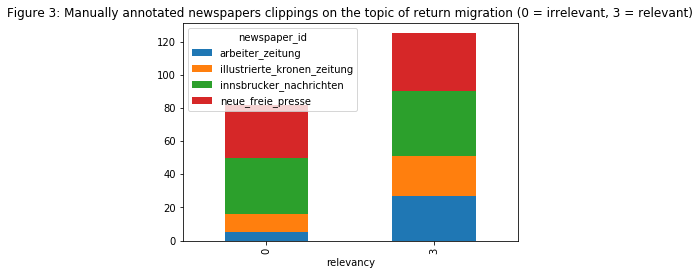

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df_newspaper = pd.read_csv('data/export_returnmigration_16_04_2021_21_35.csv')
fig = df_newspaper.groupby(['relevancy','newspaper_id']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Figure 3: Manually annotated newspapers clippings on the topic of return migration (0 = irrelevant, 3 = relevant)')
plt.show()

In [6]:
display(df[12:14].style.set_caption('Table 3: Text with relevancy labels (3 = relevant; 0 = irrelevant) ').hide_index())


relevancy,text
3,"[Oesterreichisch=ungarische Natural=Verpflegsstation in Hamburg.] Heute tritt in Hamburg die vom Oesterreichisch=ungarischen Hilfsvereine errichtete NaturalVerpflegsstation ins Leben. In derselben befinden sich vorläufig sechs Betten, die aber bei dem starken Andrange hilfesuchender Oesterreicher und Ungarn, insbesondere der Rückwanderer aus überseeischen Ländern, beiweitem nicht ausreichend sind, die wünschenswerthe Vergrößerung der Verpflegsstatton kann erst erfolgen, sobald der Verein die dazu nöthigen Geldmittel aufzubringen in der Lage sein wird. Die in der Verpflegsstation untergebrachten Landsleute und auch solche, welche dort nicht untergebracht werden können, erhalten außerdem eine einfache, aber ausreichende Nahrung (Frühstück, Mittag= und Abendbrot), wogegen die Unterstützung bedürftiger Reisender mit Bargeld von heute an eingestellt wurde."
0,"[Die Bilanz von Monte=Carlo.] Der Mailänder Secolo veröffentlicht die Bilanz von Monte=Carlo, wie sie mit Schluß des Finanzjahres (31. October) aufgestellt wurde. Das Erträgniß der Spielbank betrug 14.850,000 Francs (im vergangenen Finanzjahre 19.850,000 Francs). Ausgaben: Civilliste für den Fürsten Albert von Monaco 2.000,000 Francs; Polizei, Gendarmerie, Unterricht und öffentliche Anlagen 1.500,000 Francs; Directoren, Verwalter, Croupiers und Dienstpersonal 1.000,000 Francs; Theater, Orchester, Rennen, Regatten, Taubenschießen und Wohlthätigkeit 800,000 Francs; Annoncen und Einschaltungen 500,000 Francs; Reisegelder für verunglückte Spieler, um ihnen die Heimkehr zu ermöglichen, 100,000 Francs; ebensoviel wurde auch für die Verhinderung von Selbstmorden verausgabt. Nichtsdestoweniger haben sich im abgelaufenen Finanzjahre 35 Personen wegen ihrer Spielverluste entleibt."


Special attention was paid to ensure that the collection was representative for the topic and the data of high quality. For representativeness, full newspaper articles from different eras between 1850 and 1950 were taken into account (also articles where return migration was only a subordinate topic), making sure no important aspect of return migration movements was left out. The high quality of Optical Character Recognition (OCR) of the newspaper issues in the platform made sure that no bigger  distortions caused by OCR errors had to be dealt with. Within the NewsEye project, a dataset of some 1.5 million pages from the participating national libraries of Austria, France, and Finland was re-OCRed which led to impressive improvements in OCR quality when compared to the original datasets, producing output with character error rates below 1 percent <cite data-cite="6142573/NBV4BG2G"></cite>.


Before text mining methods could be applied, the collection had to be cleaned and pre-processed (as described in the step 2). 

#### Step 2: Cleaning, tokenizing and stemming the text 

Before natural language processing (NLP) methods can be applied, in a first step, the text must be cleaned (discarding punctuation and capitalization of words, removal of stop words, lower case the text), tokenized (breaking text into individual linguistic units) and stemmed (reduction of inflected words to their root words). A further preprocessing step that could be applied is lemmatization (converting words to their lemma form/lexeme). This step, however, had a negative effect on the final result and therefore was not used.  The list of German stop words provided by the NLTK package was extended to include more words. In order to do this, a longer list of German stop words was retrieved from https://countwordsfree.com/stopwords/german and added to the existing list. In addition, highly frequent words such as the search terms (e.g., 'Rückkehr' (*return*)) were also filtered out, because these words understandably would have a predominant relevancy. This improved the final results considerably. 

It turned out to be important to pay attention to the order in which the single steps are applied. Preprocessing starts with the initial cleaning, continues with the removal of stop-words and ends with the stemming of the remaining words. Table 4 shows what the same articles from Table 1 look like after pre-processing (column 'tokenized').

In [7]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
import spacy

#functions to clean and tokenize the data
def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower() 
    text = nltk.word_tokenize(text)
    return text

#remove stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('german')
#add stop words manually
stop_words.extend(['wien', 'heimgekehrten', 'rückwanderung','heimkehr',"heimkehrer", "rückkehr", "heimkehren", "zurückkehren", "a", "ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

#stemming
stemmer = PorterStemmer()
def stem_words(text):
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] 
    except IndexError: 
        pass
    return text

#apllying all functions 
def apply_all(text):
    return stem_words(remove_stop_words(initial_clean(text)))

df['tokenized'] = df['text'].apply(apply_all) 


display(df[12:14].style.set_caption('Table 4: Relevancy, original text and preprocessed text').hide_index())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c62255\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c62255\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


relevancy,text,tokenized
3,"[Oesterreichisch=ungarische Natural=Verpflegsstation in Hamburg.] Heute tritt in Hamburg die vom Oesterreichisch=ungarischen Hilfsvereine errichtete NaturalVerpflegsstation ins Leben. In derselben befinden sich vorläufig sechs Betten, die aber bei dem starken Andrange hilfesuchender Oesterreicher und Ungarn, insbesondere der Rückwanderer aus überseeischen Ländern, beiweitem nicht ausreichend sind, die wünschenswerthe Vergrößerung der Verpflegsstatton kann erst erfolgen, sobald der Verein die dazu nöthigen Geldmittel aufzubringen in der Lage sein wird. Die in der Verpflegsstation untergebrachten Landsleute und auch solche, welche dort nicht untergebracht werden können, erhalten außerdem eine einfache, aber ausreichende Nahrung (Frühstück, Mittag= und Abendbrot), wogegen die Unterstützung bedürftiger Reisender mit Bargeld von heute an eingestellt wurde.","['oesterreichischungarisch', 'naturalverpflegsst', 'hamburg', 'hamburg', 'oesterreichischungarischen', 'hilfsverein', 'errichtet', 'naturalverpflegsst', 'leben', 'befinden', 'vorläufig', 'betten', 'starken', 'andrang', 'hilfesuchend', 'oesterreich', 'ungarn', 'insbesonder', 'rückwander', 'überseeischen', 'ländern', 'beiweitem', 'ausreichend', 'wünschenswerth', 'vergrößerung', 'verpflegsstatton', 'erfolgen', 'sobald', 'verein', 'nöthigen', 'geldmittel', 'aufzubringen', 'lage', 'verpflegsst', 'untergebrachten', 'landsleut', 'untergebracht', 'erhalten', 'einfach', 'ausreichend', 'nahrung', 'frühstück', 'mittag', 'abendbrot', 'wogegen', 'unterstützung', 'bedürftig', 'reisend', 'bargeld', 'eingestellt']"
0,"[Die Bilanz von Monte=Carlo.] Der Mailänder Secolo veröffentlicht die Bilanz von Monte=Carlo, wie sie mit Schluß des Finanzjahres (31. October) aufgestellt wurde. Das Erträgniß der Spielbank betrug 14.850,000 Francs (im vergangenen Finanzjahre 19.850,000 Francs). Ausgaben: Civilliste für den Fürsten Albert von Monaco 2.000,000 Francs; Polizei, Gendarmerie, Unterricht und öffentliche Anlagen 1.500,000 Francs; Directoren, Verwalter, Croupiers und Dienstpersonal 1.000,000 Francs; Theater, Orchester, Rennen, Regatten, Taubenschießen und Wohlthätigkeit 800,000 Francs; Annoncen und Einschaltungen 500,000 Francs; Reisegelder für verunglückte Spieler, um ihnen die Heimkehr zu ermöglichen, 100,000 Francs; ebensoviel wurde auch für die Verhinderung von Selbstmorden verausgabt. Nichtsdestoweniger haben sich im abgelaufenen Finanzjahre 35 Personen wegen ihrer Spielverluste entleibt.","['bilanz', 'montecarlo', 'mailänder', 'secolo', 'veröffentlicht', 'bilanz', 'montecarlo', 'schluß', 'finanzjahr', '31', 'octob', 'aufgestellt', 'erträgniß', 'spielbank', 'betrug', '14850000', 'franc', 'finanzjahr', '19850000', 'franc', 'ausgaben', 'civillist', 'fürsten', 'albert', 'monaco', '2000000', 'franc', 'polizei', 'gendarmeri', 'unterricht', 'öffentlich', 'anlagen', '1500000', 'franc', 'directoren', 'verwalt', 'croupier', 'dienstperson', '1000000', 'franc', 'theater', 'orchest', 'rennen', 'regatten', 'taubenschießen', 'wohlthätigkeit', '800000', 'franc', 'annoncen', 'einschaltungen', '500000', 'franc', 'reisegeld', 'verunglückt', 'spieler', 'ermöglichen', '100000', 'franc', 'ebensoviel', 'verhinderung', 'selbstmorden', 'verausgabt', 'nichtsdestowenig', 'abgelaufenen', 'finanzjahr', '35', 'personen', 'spielverlust', 'entleibt']"


In addition, we divided the collection into a training/feedback corpus and a testing corpus. This provided a set of documents (training corpus) to train the algorithm and a set of documents (testing corpus) to test the efficiency of the chosen methods (step 3).

#### Step 3: Splitting the collection into a training and a testing corpus

In a second step, the collection was divided into a training/feedback and a testing corpus. To do this, the *numpy.random.rand()* function was used to create an array with a specific shape and fill it with random values. This made it possible to get a good mix of relevant and non-relevant articles in each of the corpora. As this function is based on randomness and the division of the corpora can vary with each call, a random seed was set to create reproducible calls. This means that all random numbers generated after setting the seed are the same on each machine.

The training corpus contains 123 articles, 75 of which are relevant and 48 irrelevant.
The test corpus consists of 84 articles, 50 of which are relevant and 34 irrelevant.


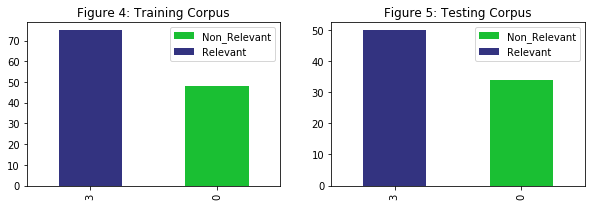

In [8]:
my_colors = [(0.20,0.200,0.50), (0.100, 0.75, 0.200)] #set colors

#create testing and training corpus
np.random.seed(1)
msk = np.random.rand(len(df)) < 0.599
train_df = df[msk]
train_df.reset_index(drop=True,inplace=True)
test_df = df[~msk]
test_df.reset_index(drop=True,inplace=True)

#plot the result
fig, axes = plt.subplots(1,2,figsize=(10,3))
test_df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20), ax=axes[1])
test_df.relevancy.value_counts().plot(kind='bar', color = my_colors, ax=axes[1])
train_df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20), ax=axes[0])
train_df.relevancy.value_counts().plot(kind='bar', color = my_colors, ax=axes[0])
axes[1].legend(['Non_Relevant', 'Relevant'])
axes[0].legend(['Non_Relevant', 'Relevant'])
axes[1].title.set_text('Figure 5: Testing Corpus')
axes[0].title.set_text('Figure 4: Training Corpus')

print(f"The training corpus contains {len(train_df)} articles, {train_df.relevancy.value_counts()[3]} of which are relevant and {train_df.relevancy.value_counts()[0]} irrelevant.")
print(f"The test corpus consists of {len(test_df)} articles, {test_df.relevancy.value_counts()[3]} of which are relevant and {test_df.relevancy.value_counts()[0]} irrelevant.")   

### 2.5 Applying LDA and the Jensen Shannon divergence (JSD) to classify a corpus into relevant and irrelevant articles

In order to be able to separate relevant from irrelevant documents, LDA was used to group words and similar expressions that best characterize relevant or irrelevant documents and to provide every article with information on their topic distribution. The Jensen-Shannon divergence (JSD) method, on the other hand, was used to measure the similarity between the topic distribution of documents. While the training and feedback corpus was used to train the topic modeling algorithm, the test corpus helped to test the efficiency of the similarity measure.

#### Step 4: Training the Latent Dirichlet allocation (LDA) algorithm

For the text classification, Latent Dirichlet allocation (LDA), which belongs to the broader category of methods called topic modeling, was used to group semantically related words <cite data-cite="6142573/VPCBKFBD"></cite>. For the topic on return migration, a high number of topics (250 in this case) leads to better results. In order to represent each document by a small number of topics, a low alpha value was chosen. Low beta, on the other hand, means that each topic is only represented by a small number of words. The function *random_state* serves as a seed in order to make it possible to reproduce the training process. The following example shows the top 20 words of topic number 47. It reflects a mass return migration movement of *millions* of *people* to specific *counties* or *cities*. This topic is clearly connected to return migration. 

In [9]:
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import gensim.corpora as corpora
import gensim, spacy, logging, warnings
from gensim.models import CoherenceModel
from gensim.utils import lemmatize, simple_preprocess

#function to train the topic model
def train_lda(data):
    num_topics = 250
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=0.2e-2, eta=1e-2, minimum_probability=0.0, passes=5, iterations=200, update_every=1, random_state=22)
    return dictionary,corpus,lda

#apply function and check results
dictionary,corpus,lda = train_lda(train_df)
print("Topic number 47: ")
lda.show_topic(topicid=47, topn=20)

ImportError: DLL load failed: The network path was not found.

Topic models are based on the assumption that a relatively small set of latent topics underlies natural language texts, where a word may belong to several topics. Topic models use the so-called bag-of-words assumption within a document, while documents can be 'represented as random mixtures over latent topics, where each topic is characterised by a distribution over words', as described by Blei, Ng and Jordan <cite data-cite="6142573/VPCBKFBD"></cite>. While several statistical algorithms for topic modeling exist, LDA was chosen for this approach because it has shown a good ability to cluster documents <cite data-cite="6142573/YJ6WDMIM"></cite>. When using LDA, it needs to be highlighted that the model results are not deterministic. Results are always affected by both the choice of parameters and the built-in stochastic process. Maier et al. <cite data-cite="6142573/BMJS79M7"></cite> therefore proposed the following guidelines in order to increase reliability, interpretability, and validity of LDA models: 

1. Cleaning and preprocessing steps need to be used reasonably as well as in a correct order. A good knowledge of the corpus and text interpretation of results helps to decide on which steps work well. 

2. The selection of LDA parameters is crucial. The number of topics depends on the corpus and on the research project. Topic modeling is used for various needs: understanding given topics in a corpus <cite data-cite="6142573/5ZGM8EKM"></cite>, capturing discourse dynamics <cite data-cite="6142573/VJZ89VCM"></cite>, getting a better insight into the type or genre of documents in a corpus <cite data-cite="6142573/YQFJLI5C"></cite>, capturing the evolution of topics and trends within multilingual collections <cite data-cite="6142573/SCBME2FU"></cite>, or comparing different corpora <cite data-cite="6142573/YJ6WDMIM"></cite>. Each of these application areas needs different parameters. While methods to automatically determine the topic number can be helpful in some cases <cite data-cite="6142573/CHE86H2F"></cite><cite data-cite="6142573/3MAA8Z5M"></cite>, close reading a considerable amount of documents remains most reliable. 

3. Finally, results from topic models are the beginning, not the end of an analysis. Interpreting the results of topic modelling as stable themes needs to be viewed critically. Nevertheless, topic modeling does a great job in clustering, which is why it is well suited for corpus building approaches. 

As it turned out, for the topic on return migration it was helpful to train a high number of topics (250 in this case) and it was chosen to have each article be represented by a small number of topics (step 4).

After training the LDA algorithm, it is easy to see that not all topics have the same dominance in the training corpus. To understand which topic is most prominent in a document, topics with the highest contribution for a document have to be identified (step 5). 

#### Step 5: Finding the dominant topic for each article 

After training the LDA algorithm, each of the documents in the training/feedback corpus was represented by one or more topics but not all topics have the same dominance. In order to see which topic is most prominent in a document, topics with the highest contribution for a document can be identified. As can be seen in Table 5, the topic contribution of the most dominant topics is very high (between 0.97 and 0.99). This means that each document is mainly represented by one topic. For example, topic number 47 represents document number 43. 

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, relevancy=df['relevancy']):
    sent_topics_df = pd.DataFrame()

    #get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list   
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for s, (topic_num, prop_topic) in enumerate(row):
            if s == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #add relevancy to the end of the output
    contents = pd.Series(relevancy)
    
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, relevancy=df['relevancy'])


#format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Relevancy']

display(df_dominant_topic[43:49].style.set_table_attributes("style='display:block'").set_caption('Table 5: Dominant topics for each article, topic keywords and relevancy of the artilces').hide_index())


In [ ]:
f"The text of article 43, which is most represented by topic number 47: \n \n {train_df['text'][43]}."

A visualization can help to see how good dominant topics (topics with the highest contribution for a document) are separated between relevant and irrelevant documents. The parameters of LDA were chosen so that a document was mainly represented by one topic (step 6). 

## Step 6: Visualizing the relationship of dominant topics and relevance labels

In order to see how well the dominant topics are separated between relevant (3) and non-relevant (0) articles, a network visualization was plotted using the Python packages *Pandas* and *Networkx*. This visualization helps to see how effective the model was trained.  For the network, the most dominant topic as well as the relevancy label for each newspaper clipping are brought in connection with each other. As can be seen in Figure 6 in the bottom left quadrant, topic number 47 is only connected to articles labeled as relevant (= 3). 

In [ ]:
import networkx as nx
import seaborn as sns
import sys

#create a list with topics and the relevancy
df_dominant_topic.to_csv('topic_relevancy.csv')
import csv
with open('topic_relevancy.csv',  encoding="utf8") as infile:
    reader = csv.reader(infile)    
    csv_data = list(reader)
df_dominant_topics= pd.read_csv('topic_relevancy.csv', usecols = ['Dominant_Topic', 'Relevancy'])
list_topic = []
for key in csv_data: 
    list_topic.append(key[2])
topic = list_topic[1:]

list_relevancy = []
for key in csv_data:
    list_relevancy.append(key[5])
relevance = list_relevancy[1:] 


#build a dataframe with 4 connections
df = pd.DataFrame({ 'from': relevance, 'to': topic})

#build the graph 
plt.figure(figsize=(6.5,6.5))
G = nx.from_pandas_edgelist(df, 'from', 'to')
color_map = []
for node in G:
    if node == "3":
        color_map.append('#b85399')
    if node == "0":
        color_map.append('#b85399')
    else: 
        color_map.append('#2d95b3') 
#plot it 
nx.draw(G, with_labels=True, node_color=color_map, node_size=500)
plt.legend(('Relevancy labels (0= irrelevant, 3= relevant)', 'Relationship between entities'),
           loc='upper left')
plt.title('Figure 6: This graph shows how well the dominant topics are separated between relevant and irrelevant newspaper clippings.')
plt.show()



The Jensen-Shannon divergence (JSD) method was then used to measure the similarity between the topic distribution of documents. Just like LDA, JSD also depends on decisions of the researcher, though far less. For example, it needs to be decided on how many of the most similar texts within the training/feedback set are retrieved and used for feedback on the relevancy. JSD measures which documents are statistically 'closer' (and therefore more alike) by comparing the divergence of their topic distributions. The smaller the distance, the more similar two articles are <cite data-cite="6142573/LM8L24CE"></cite>. 

#### Step 7: Finding similar articles in the training corpus using the Jensen-Shannon function

The topic distributions for each document obtained were used to calculate the degree of similarity between documents by using the JSD method. The first function implements a Jensen-Shannon similarity between the input query (an LDA topic distribution for a document) and the entire corpus of topic distributions. It returns an array of length M where M is the number of documents in the corpus. The second function implements the Jensen-Shannon distance above and returns the top k indices of the smallest Jensen-Shannon distances. For example, for the here shown and so far unseen article from the testing corpus (index 6), which talks about Russian returnees returning from America to Europe, 10 most similar documents from the training corpus were retrieved. Those documents carry the information on the relevancy, as can be seen in Table 6. Since more than 60 percent of the most similar articles were annotated as relevant, the article was classified as relevant. This process was carried out for all articles in the testing corpus.   

In [ ]:
from scipy.stats import entropy

#JSD functions
def jensen_shannon(query, matrix):
    p = query[None,:].T 
    q = matrix.T 
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))
def get_most_similar_documents(query,matrix,k=10):
    sims = jensen_shannon(query,matrix) 
    return sims.argsort()[:k] 


#lists for the output

text_relevant = []
number_relevant = []
text_non_relevant = []
number_non_relevant = []

#most similar articles

bow = dictionary.doc2bow(test_df.iloc[6,2])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
doc_topic_dist.shape
sim_ids = get_most_similar_documents(doc_distribution,doc_topic_dist)
similar_df = train_df[train_df.index.isin(sim_ids)]
print('Unseen article from the test corpus (index 6): ')

print("\n")
print(test_df.iloc[6,1])
print("\n")
similar_df = similar_df.drop(['tokenized'], axis =1)
similar_df['text'] = similar_df['text'].apply(lambda x: x[:300])
display(similar_df.style.set_caption('Table 6: Most similar articles from the training/feedback corpus for article number 6'))

Finally, the topic distribution of each new article (from the test corpus) is compared to the topic distribution of each article in the feedback set. Then the 10 most similar articles from the feedback set are retrieved. If 60 percent of those articles were labeled as relevant, the new article was marked/classified as relevant, too. Otherwise it was classified as irrelevant (see Figure 7, step 7).

In [ ]:
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 7: This example shows the recommendation of the ten most similar articles for one unseen article of the test corpus. The relevance levels tell whether the articles were manually classified as relevant or as irrelevant. ",
          ]
        }
    }
}
display(Image("images/figure.png"), metadata=metadata)


If 60 percent of those articles were labeled as relevant, the new article was marked/classified as relevant, too. Otherwise it was classified as irrelevant (step 8). 

#### Step 8: Classification in relevant and irrelevant articles

In this step, every article from the test corpus goes through a loop where it gets compared to the articles in the training/testing corpus. In this loop, for each article from the test corpus, the 10 most similar articles were retrieved from the feedback corpus. Those 10 articles give feedback on their relevancy, numbers that serve as a base for the calculation and final classification. As can be seen in Table 7, article number 6 was classified as relevant (first column, second row).

In [ ]:
index = 0
#loop for the classification of each article
while index < len(test_df) -1:
    index +=1
    new_bow = dictionary.doc2bow(test_df.iloc[index,2])
    new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
    doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
    doc_topic_dist.shape
    most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)
    most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
    relevant = []
    if sum(most_similar_df['relevancy']) > 17: 
        text_relevant.append(test_df.iloc[index,1])
        number_relevant.append(test_df.iloc[index,0])
    else:
        text_non_relevant.append(test_df.iloc[index,1])
        number_non_relevant.append(test_df.iloc[index,0])
    pass

#dataframe with results

df_relevant = pd.DataFrame(np.column_stack([text_relevant, number_relevant]), 
                               columns=['Relevant_Text', 'Real_Relevancy'])

df_non_relevant = pd.DataFrame(np.column_stack([text_non_relevant, number_non_relevant]), 
                               columns=['Unrelevant_Text', 'Real_Revelancy'])


df_results = pd.concat([df_relevant,df_non_relevant], ignore_index=True, axis=1)
df_results.columns=['This text was classified as relevant', '3','This text was classified as irrelevant', '0']

df_results['This text was classified as relevant'][0:4] = df_results['This text was classified as relevant'][0:4].apply(lambda x: x[:300])
df_results['This text was classified as irrelevant'][0:4] = df_results['This text was classified as irrelevant'][0:4].apply(lambda x: x[:300])
display(df_results[0:4].style.set_caption('Table 7: Classified articles into relevant and irrelevant').hide_index())

This solution was simple and exceedingly successful, as can be seen in Table 8. Since the documents in the testing corpus carry the labels on relevancy, too, a simple evaluation (correct results divided by the number of documents in the testing corpus) is possible. As an overall result, up to 85 per cent of the articles from the testing corpus are classified correctly. 

In [ ]:
df_results['This text was classified as relevant'][0:20] = df_results['This text was classified as relevant'][0:20].apply(lambda x: x[:50])
df_results['This text was classified as irrelevant'][0:20] = df_results['This text was classified as irrelevant'][0:20].apply(lambda x: x[:50])
display(df_results[0:20].style.set_caption('Table 8: Articles automatically grouped into relevant and non-relevant articles. The manually assigned numbers proof whether the articles were selected correctly.').hide_index())

In [ ]:
#calculation of correct or incorrect classified results
rev_3 = []
for key in df_results['3']:
    if key == '3':
        rev_3.append(key)
rev_0 = []
for key in df_results['3']:
    if key == '0':
        rev_0.append(key)
non_rev_3 = []
for key in df_results['0']:
    if key == '3':
        non_rev_3.append(key)
non_rev_0 = []
for key in df_results['0']:
    if key == '0':
        non_rev_0.append(key)
result_right = len(non_rev_0) + len(rev_3)
result_wrng = len(non_rev_3) + len(rev_0)
all_ = len(non_rev_3) + len(rev_0) + len(non_rev_0) + len(rev_3)
score = result_right / all_
f"In total, {score} per cent of the selected articles have been classified correctly."

These results were seen as good enough for further processing. The last step involves the whole unlabeled corpus that needs to be disambiguated.

##  Step 9: Classification of the entire corpus

For copyright reasons, the data of the entire collection cannot be published. However, the classification process of the entire corpus repeated the steps already explained above. In this step, the entire collection (instead of the testing corpus) was compared with the pre-labelled documents in the training/feedback corpus and further classified into relevant and irrelevant articles. The collection was again created with keyword searches by using the same queries as for the training/feedback corpus from the newspapers *Neue Freie Presse*, *Arbeiter-Zeitung*, *Illustrierte Kronen Zeitung* and *Innsbrucker Nachrichten* and exported from the NewsEye platform. It consisted of 38 630 newspaper clippings with a minimum length of 30 tokens. This collection was completely new, which means that none of the clippings were manually annotated as relevant or irrelevant. A calculation of the percentage of correctly selected newspaper clippings was therefore not possible.

After the classification into relevant and irrelevant articles, it was necessary to find out if the method had worked for the entire corpus. This involved reading a considerable amount of classified articles. Also word clouds were created to validate the overall quality of the classification. As can be seen in Figures 8 and 9, the two bi-gram word clouds (clouds of sequences of two adjacent items from a token sequence, step 10) effectively reflect different contents. 

## Step 10: Craeting bi-gram word clouds

*N*-grams are contiguous sequences of n items from a given text. This means that words are not considered as individual units, but in relation to each other. Since languages are seldom representable by single words, for humanities scholars, n-grams can be helpful to get an overview of their collection, to find discourse markers, or to evaluate the quality of a model. The *NLTK package* was used to build the bi-grams: nltk.bigrams() returns an iterator (a generator specifically) of bi-grams, with *ngram-range=()* was used to set the value of *n* (*n*-gram of size 1 is a unigram; size 2 is a bigram, size 3 is a trigram). In order to visualize the results in word clouds, the frequency of the bigrams was calculated. To create good *n*-grams, the corpus was first pre-processed (see step 'Cleaning, tokenizing and stemming the text'). For the word cloud visualisation, the *NLTK package* was used as well. The following lines of code were used to create the bi-gram word clouds: 

bigrams_list = list(nltk.bigrams(df_relevant))<br>
dictionary = [' '.join([str(tup) for tup in bigrams_list])]<br>
vectorizer = CountVectorizer(ngram_range=(2, 2))<br>
bag_of_words = vectorizer.fit_transform(dictionary)<br>
vectorizer.vocabulary_<br>
sum_words = bag_of_words.sum(axis=0)<br>
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]<br>
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)<br>
words_dict = dict(words_freq)<br>
w_height = 1500<br>
w_width = 2000<br>
w_max_words = 200<br>
wordCloud = WordCloud(max_words=w_max_words, height=w_height, width=w_width)<br>
wordCloud.generate_from_frequencies(words_dict)<br>
plt.figure(figsize=(20, 15))<br>
plt.plot<br>
plt.imshow(wordCloud, interpolation='bilinear')<br>
plt.axis("off")<br>
plt.show()<br>

While bi-grams within the corpus of articles classified as relevant (Figure 8) are clearly associated with return migration topics, the opposite is true for the bi-grams within the corpus of articles classified as irrelevant (Figure 9). Very frequent bi-grams such as 'heimkehrend krieger' (*returning warriors*), 'rückkehr auskunft' (*homecoming information*), 'verboten rückkehr' (*forbidden return*), 'fürsorg heimkehrend' (*caring returning*), ‘roten kreuz’ (*red cross*) and many more in Figure 8 have an obvious link to the topic of return migration. Very frequent bi-grams such as ‘gestern abend’ (*yesterday evening*), ‘rückkehr kaiser’ (*return emperor*), 'sr majestät' (*his majesty*) or ‘kaiser franz’ (*emperor franz*) in Figure 9, on the other hand, do not address news coverage on return migration.

In [ ]:
from IPython.display import Image, display
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 8: Word cloud of 20 415 articles that were classified as relevant",
          ]
        }
    }
}
display(Image("images/relevant_articles.png"), metadata=metadata)

In [ ]:
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 9: Word cloud of 18 215 articles that were classified as irrelevant",
          ]
        }
    }
}
display(Image("images/irrelevant_articles.png"), metadata=metadata)

### 2.6 Source and interface criticism

The second step in the historical method would involve a thorough source and interface criticism for the digital dataset created for further processing. Although this is not within the scope of the paper, some critical remarks should be mentioned here: For the return migration case study, it was not possible to carry out these steps on a collection that would have covered enough newspaper issues or all relevant time periods to answer many research questions on the topic on return migration. The NewsEye platform only contains a small selection of digitised Austrian newspapers provided by the [Autrian National Library (ONB)](https://www.onb.ac.at/). In order to meet the demands for external representativeness (which means that the used digitized newspapers are representative for discourses on return migration in the Austrian press) it would be necessary to apply the method to all newspapers - those digitally available and, in all fairness, also those not digitally available. Even though the ONB hosts many of the newspapers for the needed time periods in a digital form, missing article separation, noisy OCR, missing download functions, and sometimes unclear copyright issues make it impossible to apply the method to a larger newspaper-corpus from the ONB interface for further processing. 

Currently, a number of digital newspaper projects such as [NewsEye](https://www.newseye.eu/) <cite data-cite="6142573/FRE6XIFV"></cite>, [ViralTexts](https://viraltexts.org/), [Oceanic Exchanges](https://oceanicexchanges.org/), [impresso](https://impresso-project.ch/app/), or [Living with Machines](https://livingwithmachines.ac.uk/team-2/) are working on methods and interfaces to improve access and research with historical newspapers, but it will still take a while until newly developed tools will be implemented in (national) historical newspaper archives containing millions of digitized newspaper pages. Until then research with digital newspaper corpora will remain biased by the selections available through the interfaces, the quality of the digitized newspapers and access-options to entire collections.

### 2.7 After the corpus building is before interpretation

For historians conducting qualitative research, the process of corpus building ends when a corpus allows for qualitative evaluations. At this point the third step of the historical method - interpretation - is at the heart of the research method. A thorough interpretation of the results would go far beyond the scope of this paper but we would still like to give some outlook to the next steps researchers could undertake. In-depth investigations of text corpora are part of the methodology of qualitative corpus analysis. While a suitable corpus is a prerequisite for fine-grained textual examination, as already described, annotations and interpretations are at the heart of qualitative analysis <cite data-cite="6142573/DXVIWVKG"></cite>. 

#### Step 11: Creating a sub-corpus on return migration form the Americas 1850-1950


The sub-corpus on return migration from the Americas was created with a complex keyword search, using queries such as 'Rückwanderer' (*returnee*) or 'Amerikamüde' (*america weary*) or combined terms in a specific word distance such as 'Rückkehr/Heimkehr/Rückwanderung ...Amerika/NewYork/Brasilien/Argentinien/Kanada' (*return/return home/return migration… America/New York/Brazil/Argentina/Canada*) etc. While in the first step all relevant articles were collected, in a second step the focus was on context-rich articles (containing discourses). Content-poor articles (articles with no discourse, e.g., statistical reports on people that returned from the Americas) were not included in the final collection because they do not contribute anything significant regarding questions on how return migration was written about in the press. All in all, a collection of about 350 newspaper clippings was created.

Since, as described, it was not possible to create a representative corpus for the entire range of return migration issues for further classification, the focus was placed on creating a sub-corpus for return migration from America between 1850 and 1950. A collection of 350 articles was created and for further qualitative analysis (step 11).

Chapter 2.7.1 shows what kind of discourses we found in the collection on return migration from the Americas and how they developed over time. The chapter is intended to provide an insight into the discourses in historical newspapers on return migration, it does not represent a discourse analysis in its entirety since that would take the historical, political and social context including sources other than newspapers to re-construct the complexity of a discourse into account.

#### 2.7.1 Qualitative Analysis of the Austrian Media Discourse on returnees from America between 1850 and 1950

People who emigrated to Austria by their own choice and later decided to come back to their homelands between 1850 and 1950 had different reasons for their decisions to return: success, failure, homesickness, rejection in the new country, changes in the economic or socio-political conditions in their native countries, or perhaps family members asked them to return. One of the first stories on return migration from America to Austria can be found in Ferdinand Kürnberger's novel 'Der Amerika-Müde' (*The America-Tired*) <cite data-cite="6142573/RWUWZF7D"></cite>. This book made reference to the American experience of the Austrian writer Nikolaus Lenau, who left for America in 1832 with the aim to emigrate. However, oOnly eight days after his arrival in Baltimore Lenau wrote: 'Brothers, these Americans are petty minded people who turn the heavens’ stomachs. Dead to all things intellectual, as dead as a doornail' <cite data-cite="6142573/6IFE7WQI"></cite>. Due to private problems (the discontinuation of his  medical studies and a failed love story) he returned to Europe as early as 1833. Homesick and disappointed by his impressions and his experiences in Baltimore, Pennsylvania, Ohio, and the Niagara Falls, Lenau came back to Austria. Neither had he found the land of freedom, nor had he been able to secure himself materially <cite data-cite="6142573/AXWYSSW3"></cite>. 

Each returning migrant had his or her own return story, a story that did not only concern the returnee him- or herself. Return migration always also had an impact on the country of origin and its people. Every (mass) return migration movement was therefore accompanied with public discourses and arguments to support, promote, regulate or prohibit the return of people to their country of origin. (Critical) discourse analysis helps to understand how social interaction constitutes such discourses and arguments and how they change over time. Historical-semantic discourse analysis thus can open up semantic aspects and elements of knowledge that could escape a purely word-oriented history of meaning <cite data-cite="6142573/X8HTUPMY"></cite>.

## Step 12: Identifying discourses and creating annotations

Corpus annotations in the context of qualitative analysis are often created manually by reading and tagging documents or parts of documents. Discourses are contextualized phenomena and therefore not observable on the surface or by automatic retrieval <cite data-cite="6142573/DXVIWVKG"></cite>. Discourses therefore need to be identified by human readers and manual annotations need to be implemented by human encoders. Discourse analysis is an inductive method. Categories of similar meanings usually emerge through the inductive analytic process <cite data-cite="6142573/N6WP2ZUH"></cite>, which means that categories were formed, changed and extended during the process of reading. The final catalogue consisted of the following categories: 

- return was enhanced (R=enhanced)
- return was restricted (R=restricted)
- return migration was useless for Austria (R=useless)
- motive of delusion and disappointment (Delusion)
- return migration was a benefit for Austria (R=benefit)
- return migration was a danger for Austria (R=danger)
- Austria was overburdened (A=overburdened)
- Austria supported return migration (A=support). 


While there are a number of computer-assisted qualitative corpus analysis software programs that support manual annotations (e.g., [Atlas.ti](https://atlasti.com/), [NVivo](https://www.qsrinternational.com/nvivo-qualitative-data-analysis-software/home/), [Recogito](https://recogito.pelagios.org/), [Catma](https://catma.de/), etc.), they take a lot of time and such programs can be too advanced and sophisticated when assigning tags to a smaller manageable corpus. Therefore, in our case, a simple spreadsheet, *Microsoft Excel*, was used to annotate the sub-corpus. The first column contained the original text, the second column the occuring discourse categories, the third column contained the date of the newspaper clipping and the fourth column the title of the newspaper issue.

Within the news coverage on return migration from the Americas, eight main discourses were identified by reading through every article and manually annotating them (step 12). We take a closer look at four of those discourses: 

1. **Return migration was enhanced (R=enhanced)**: In times of mass emigration, the Austro-Hungarian Empire (1867 to 1918) had repeatedly promoted the return of Austrians and put the issue on the political agenda <cite data-cite="6142573/HP5RBUIN"></cite>. The discourse on enhancement took place mainly in the periods before and at the beginning of the two world wars (1914 to 1918; 1939 to 1945) (see Figure 10), when return was deliberately promoted to strengthen the army, but also for nationalistic reasons. The *Arbeiter-Zeitung* from 1914, for example, reported on transportation at no cost for those who were willing to return to Austria: 'A mass influx of 'reservists' [...] leave no doubt that war has broken out in Europe. [...] In New York alone, thousands of victims of the [economic] crisis [...] are now crowding into the anterooms of the consulates involved, in order to declare their intention of 'rushing to the flags', with free transport and ten heller a day pay - as far as Austrian-Hungarian reservists are concerned.'

In [ ]:
from IPython.display import SVG, HTML
import pygal 
from pygal.style import DarkStyle
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

dot_chart = pygal.Dot(dot_size=700, legend_box_size=6, x_label_rotation=70, style=DarkStyle, height=450,legend_at_bottom=True, legend_at_bottom_columns=4)

dot_chart.title = 'Return from America - Discourses'
dot_chart.x_labels = ['1872-73', '1874-75', '1876-77', '1878-79','1880-81', '1882-83', '1884-85', '1886-87', '1888-89', '1890-91', '1892-93', '1894-95', '1896-97', '1898-99', '1900-01', '1902-03', '1904-05', '1906-07', '1908-09', '1910-11', '1912-13', '1914-15', '1916-17', '1918-19', '1920-21', '1922-23', '1924-25', '1926-27', '1928-29', '1930-31', '1932-33', '1934-35', '1936-37', '1938-39', '1940-41', '1942-43', '1944-45', '1946-47', '1948-49']
dot_chart.add('R=enhanced',    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 1, 3, 9, 7, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 6, 1, 4])
dot_chart.add('R=restricted',  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('R=useless',      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('Delusion',   [4, 6, 3, 1, 0, 0, 0, 0, 1, 0, 5, 3, 2, 0, 0, 0, 2, 1, 0, 6, 4, 1, 0, 0, 2, 0, 2, 0, 0, 4, 0, 0, 0,0, 1, 0, 0, 0])
dot_chart.add('R=benefit',       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 13, 8, 6, 1, 9, 7, 3, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 1, 0])
dot_chart.add('R=danger',       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 12, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
dot_chart.add('A=overburdened',   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('A=support',        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 1, 2, 7, 7, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 11, 0, 0, 0, 0, 4])

print('Figure 10: Dot chart of manual annotations on the sub-corpus (step 13)')
display(HTML(base_html.format(rendered_chart=dot_chart.render(is_unicode=True))))


#### Step 13: Quantification of annotations 

Although qualitative analysis is often delimited from quantitative analysis, the mixing of quantitative and qualitative approaches is uncontestable <cite data-cite="6142573/DXVIWVKG"></cite><cite data-cite="6142573/BEHFC5EB"></cite>. Annotations resulting from qualitative analysis, for example, can allow for quantification and further visualization of results. For such a mixed method approach, the tags here were brought together with the years in which they occur. This made it possible to visualize the evolution of the identified discourses. for the visualization, the Python library *Pygal* was used to create an interactive data visualization.  

2. **Return migration is a benefit vs. return migration is a danger for Austria (R=benefit; R=danger)**: Returnees could help or hurt the government of the country of origin, both economically and politically. A returnee could be someone who failed in the country to which they migrated or someone who brought back skills and capital to invest in the economy of the home country. The argument of danger was mainly used during the 'panic' of 1907  (financial crisis in America resulting in bankruptcy of banks and companies as well as mass remigration of European emigrants). In 1907, the newspaper *Mährisches Tagblatt* stated: 'The homeland has reluctantly let its sons go, now people are worried because they are returning home'. The main fears were economic consequences of mass return. As early as 1908, however, the discourse on the benefit of returnees dominated, especially because workers was desperately needed. Here, the argument that returnees bring large amounts of cash back to Austria was often used to support return migration.

3. **The argument of uselessness (R=useless)**: At the same time (1908), the argument of uselessness was quite prominent as well. This argument was based on the realisation that the repatriates were of no use to the labour market because they had brought a large sum of savings with them to Austria-Hungary and wanted to return to America when the crisis was over.  For example, the newspaper Die *Neue Zeitung* wrote 1908:  'On the side of the industrial giants, hopes were pinned on getting a whole army of workers who would be willing to do any kind of work. Instead, the 'poor' repatriates [...] exchanged considerable sums of money into Austrian money and the established employment agencies remained empty'.

4. **Motive of delusion and disappointment (Delusion)**: Motives of deception and disappointment consistently played an important role in the media portrayal of returnees from America. Negative experiences of return migrations were often used to avoid further emigration flows. The *Neues Wiener Journal*, for example, reported 1927: 'But the number of returnees is also increasing, and cases are becoming more regular where fleeing one's homeland has proven to be not a last chance, but a deceptive hope [...]'.  

Discourses determine ways of thinking that are present in specific contexts and at specific times. They regulate how something is talked about and how something is not or may not be talked about. Also, discourses are filters for how something can be said and thus also for ways of thinking and acting. Finally, the significance of discourses is closely linked to the concept of power: power structures discourses and power legitimates itself through discourses (Shaper-Rinke, 2006). Analysing discourses in return migration news coverage, therefore, also reveals such power structures: Who was part of constructing reality, what guided the discourses on return migration and what was legitimised through discourse? 

## Conclusion

Even though tailored to a specific research question, t​he corpus building process presented in this paper is adaptable for other research projects that deal with similar issues. However, the procedure depends on manual annotations and a good knowledge of the corpus under investigation, and therefore may not be very interesting for those looking for more universal, unsupervised solutions. For historians, corpus building often takes up a substantial part of their work. Creating and annotating a sample corpus of about 200 articles is undoubtedly a relatively small effort, considering that it can take up to months to create good quality corpora. Therefore, an important consideration when using machine learning to support corpus building is to improve representativeness of topic-specific corpora without spending too much time to clean and organize adequate datasets. While it is - at least at this point - not yet possible for machines to understand discourses or arguments, automated methods can support scholars from the humanities to create the datasets they need to continue investigating their research questions with their usuals, close reading and text interpretative methods.

Improved methods for corpus compilation therefore support research that bridges digital and traditional historiography. In academic writing the creation of specialised newspaper corpora with the help of digital methods currently receives little attention. One important reason for this lies in the still existing shortcomings of digitized historical newspapers and interfaces used to access those collections. E.g., only recently, article separation aroused the interest of researchers in the area of artificial intelligence as well as for digital libraries. However, many of the automated methods are still under development and not yet good enough to be applied to entire digital newspaper collections. Another issue are copyrights, which can make it difficult for researchers to export larger datasets from digital libraries, which is necessary if text mining methods should be applied. 

While none of the methods presented in this paper are new or groundbreaking (most of them have been used for decades), the way they have been applied here sets this paper apart from other similar research. Topic-specific corpus building and WSD have hardly been brought into relation with each other so far, and LDA in combination with JSD also plays a subordinate role in WSD approaches. Finally, the use of manually created labels to support classification into relevant as well as irrelevant articles in the form of feedback differentiates this paper from other papers on LDA and JSD. 

One of the challenges to use machine learning methods for corpus building still lies in the necessity for researchers from the humanities to have a  basic understanding of programming languages. They need to be able to adapt code for use with their own corpopra. Also, knowledge on debugging techniques are necessary to use text mining methods such as those presented in this paper. Interdisciplinary cooperation therefore often remains at the heart of successful application of computational method, as becomes evident in this paper. At the same time interfaces that facilitate the use of text mining methods, like [Voyant Tools](https://voyant-tools.org/), [Orange Data Mining Suite](https://orangedatamining.com/) and coding environments like [Jupyter notebooks](https://jupyter.org/) or executable environments for notebooks such as [MyBinder](https://mybinder.org/) are becoming user friendlier all the time thus giving a glimpse into future use of digital methods also for historians and alike.  

## References

<div class="cite2c-biblio"></div>